## Sentiment and Trade Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data3 = pd.read_csv('merged_data.csv')

In [3]:
data3['date'] = pd.to_datetime(data3['date'])

In [4]:
print(data3.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'date', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash',
       'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'timestamp',
       'value', 'classification'],
      dtype='object')


### Sentiment Distribution

Trade counts by sentiment:
classification
Extreme Fear     18315
Extreme Greed    11220
Fear             28391
Greed            13103
Neutral           8196
dtype: int64


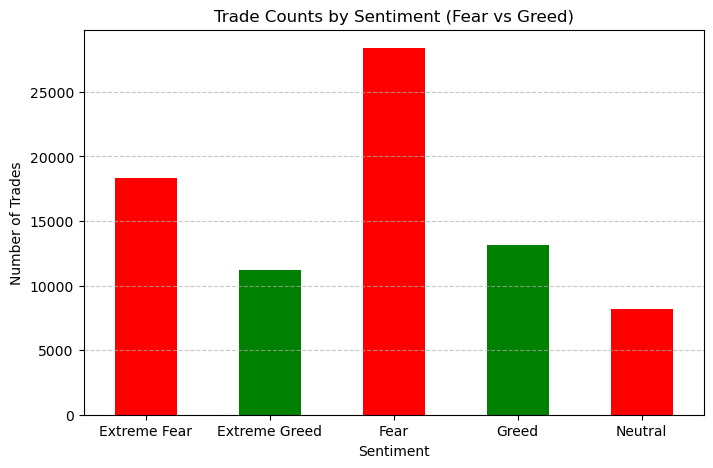

In [23]:

if 'classification' in data3.columns:
    sentiment_group = data3.groupby('classification').size()

    print("Trade counts by sentiment:")
    print(sentiment_group)

    # Graph
    sentiment_group.plot(kind='bar', figsize=(8, 5), color=['red', 'green'])
    plt.title('Trade Counts by Sentiment (Fear vs Greed)')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Trades')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The 'classification' column does not exist in the dataset.")

In [22]:
if 'classification' in data3.columns:
    required_columns = ['classification', 'Closed PnL', 'Size USD', 'Side', 'Execution Price']
    if all(col in data3.columns for col in required_columns):
        
        avg_pnl = data3.groupby('classification')['Closed PnL'].mean()
        print("Average Closed PnL:")
        print(avg_pnl)

        trade_volume = data3.groupby('classification')['Size USD'].sum()
        print("\nTrade Volume (Total 'Size USD'):")
        print(trade_volume)

        trade_count = data3.groupby('classification').size()
        print("\nTrading Activity (Total Number of Trades):")
        print(trade_count)

        avg_trade_size = data3.groupby('classification')['Size USD'].mean()
        print("\nAverage Trade Size ('Size USD'):")
        print(avg_trade_size)

        buy_sell_ratio = data3[data3['Side'].isin(['BUY', 'SELL'])].groupby(['classification', 'Side']).size().unstack(fill_value=0)
        buy_sell_ratio['BUY/SELL Ratio'] = buy_sell_ratio['BUY'] / buy_sell_ratio['SELL']
        print("\nBUY/SELL Ratio:")
        print(buy_sell_ratio[['BUY/SELL Ratio']])

        avg_execution_price = data3.groupby('classification')['Execution Price'].mean()
        print("\nAverage Execution Price:")
        print(avg_execution_price)
    else:
        print("One or more required columns are missing:", required_columns)
else:
    print("The 'classification' column does not exist in the dataset.")

Average Closed PnL:
classification
Extreme Fear      26.578119
Extreme Greed    120.893258
Fear              86.681258
Greed             78.677868
Neutral           41.957142
Name: Closed PnL, dtype: float64

Trade Volume (Total 'Size USD'):
classification
Extreme Fear     1.034137e+08
Extreme Greed    3.036845e+07
Fear             2.245354e+08
Greed            6.202511e+07
Neutral          4.251180e+07
Name: Size USD, dtype: float64

Trading Activity (Total Number of Trades):
classification
Extreme Fear     18315
Extreme Greed    11220
Fear             28391
Greed            13103
Neutral           8196
dtype: int64

Average Trade Size ('Size USD'):
classification
Extreme Fear     5646.396075
Extreme Greed    2706.635852
Fear             7908.681044
Greed            4733.657064
Neutral          5186.895612
Name: Size USD, dtype: float64

BUY/SELL Ratio:
Side            BUY/SELL Ratio
classification                
Extreme Fear          1.104447
Extreme Greed         0.666914
Fear     

### Individual Trader Analysis

Average PnL for each trader during Fear vs. Greed:
classification  Account                                   
Extreme Fear    0x083384f897ee0f19899168e3b1bec365f52a9012     210.716032
                0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd     -35.891128
                0x271b280974205ca63b716753467d5a371de622ab      20.962214
                0x28736f43f1e871e6aa8b1148d38d4994275d72c4     -52.161025
                0x2c229d22b100a7beb69122eed721cee9b24011dd     111.666096
                                                                 ...     
Neutral         0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0       0.000000
                0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23     236.267207
                0xbaaaf6571ab7d571043ff1e313a9609a10637864       1.860320
                0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3   -1046.219850
                0xbee1707d6b44d4d52bfe19e41f8a828645437aab      20.123513
Name: Closed PnL, Length: 134, dtype: float64

Unstacked Average PnL (Trader

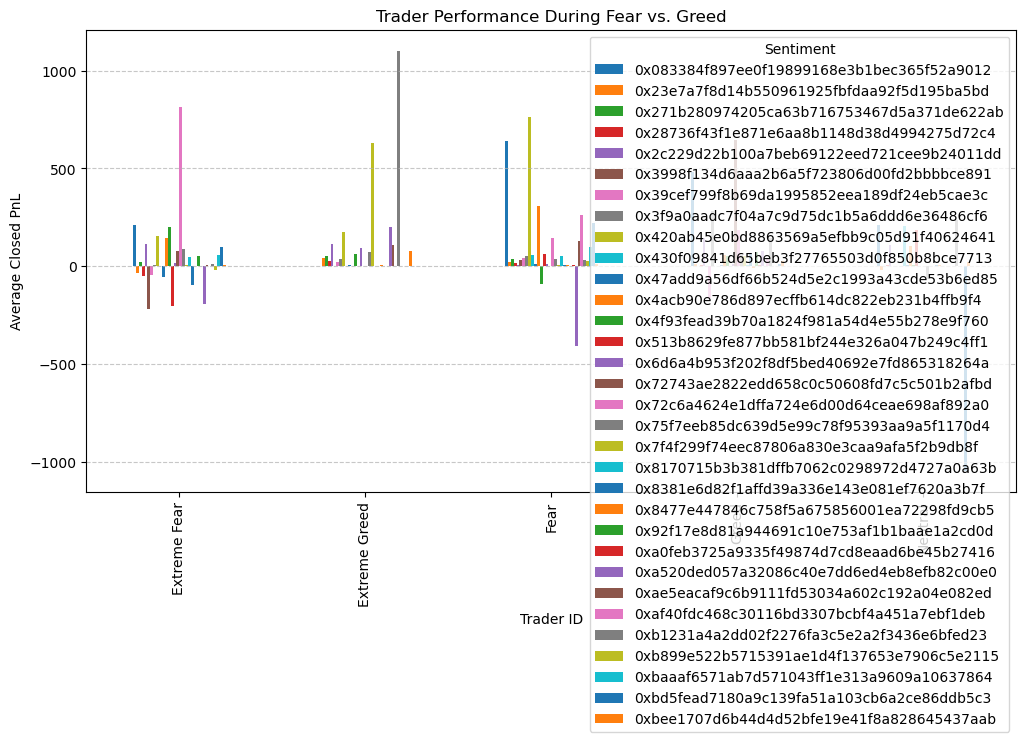

In [13]:
if 'classification' in data3.columns and 'Account' in data3.columns:
    required_columns = ['classification', 'Account', 'Closed PnL']
    if all(col in data3.columns for col in required_columns):
        trader_avg_pnl = data3.groupby(['classification', 'Account'])['Closed PnL'].mean()

        print("Average PnL for each trader during Fear vs. Greed:")
        print(trader_avg_pnl)

        trader_avg_pnl_unstacked = trader_avg_pnl.unstack(fill_value=0)
        print("\nUnstacked Average PnL (Traders as rows, Sentiments as columns):")
        print(trader_avg_pnl_unstacked)

        # Graph
        trader_avg_pnl_unstacked.plot(kind='bar', figsize=(12, 6))
        plt.title("Trader Performance During Fear vs. Greed")
        plt.xlabel("Trader ID")
        plt.ylabel("Average Closed PnL")
        plt.legend(title="Sentiment")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("One or more required columns are missing:", required_columns)
else:
    print("The 'classification' or 'Trader ID' column does not exist in the dataset.")

### Heatmap

Pearson Correlation Matrix:
                   sentiment_numeric  Closed PnL  Size USD  Execution Price
sentiment_numeric           1.000000    0.021424 -0.037845        -0.038982
Closed PnL                  0.021424    1.000000  0.142987        -0.010139
Size USD                   -0.037845    0.142987  1.000000         0.177215
Execution Price            -0.038982   -0.010139  0.177215         1.000000


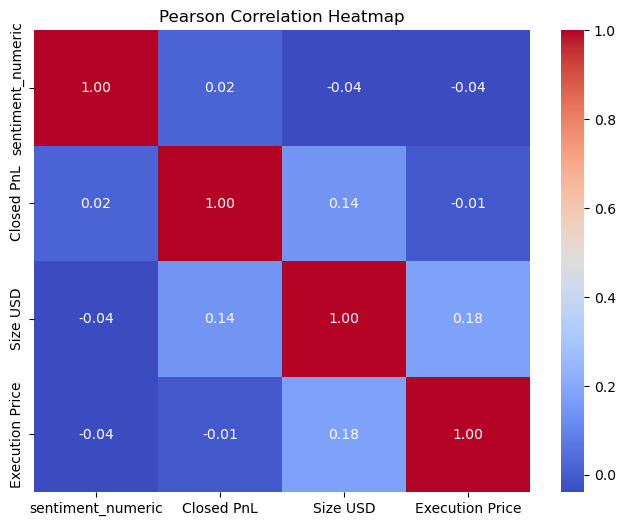

In [12]:
from scipy.stats import pearsonr
import seaborn as sns

required_columns = ['classification', 'Closed PnL', 'Size USD', 'Execution Price']
if all(col in data3.columns for col in required_columns):

    sentiment_mapping = {'Fear': 0, 'Greed': 1, 'Extreme Greed': 2, 'Extreme Fear': -1}
    data3['sentiment_numeric'] = data3['classification'].map(sentiment_mapping)

    metrics = ['sentiment_numeric', 'Closed PnL', 'Size USD', 'Execution Price']
    correlation_data = data3[metrics].dropna()

    pearson_corr = correlation_data.corr(method='pearson')
    print("Pearson Correlation Matrix:")
    print(pearson_corr)

    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Pearson Correlation Heatmap")
    plt.show()

else:
    print("One or more required columns are missing:", required_columns)

### Regression Analysis

Mean Squared Error (MSE): 998553.7209171823
R-squared (R2): 0.02245934551964701

Model Coefficients:
             Feature  Coefficient
0  sentiment_numeric    29.251611
1           Size USD     0.006579
2    Execution Price    -0.001686


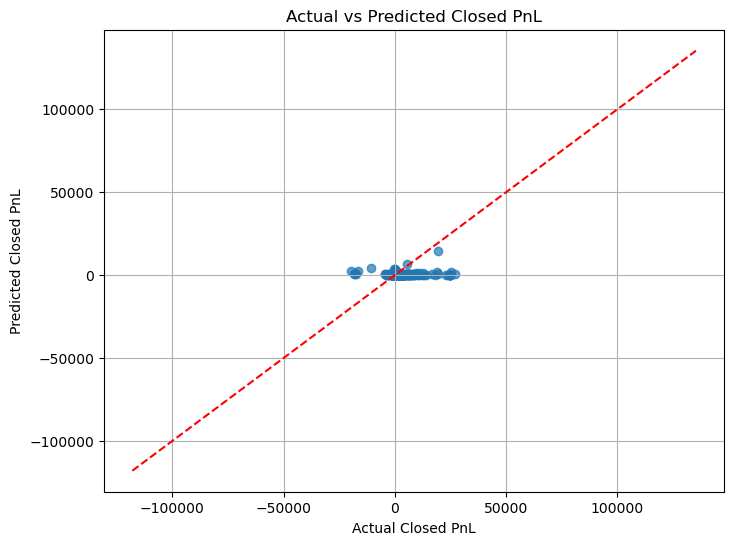

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

required_columns = ['classification', 'Closed PnL', 'Size USD', 'Execution Price']
if all(col in data3.columns for col in required_columns):
    sentiment_mapping = {'Fear': 0, 'Greed': 1, 'Extreme Greed': 2, 'Extreme Fear': -1}
    data3['sentiment_numeric'] = data3['classification'].map(sentiment_mapping)

    features = ['sentiment_numeric', 'Size USD', 'Execution Price']
    target = 'Closed PnL'
    X = data3[features].dropna()
    y = data3[target].dropna()

    X, y = X.align(y, join='inner', axis=0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")

    coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
    print("\nModel Coefficients:")
    print(coef_df)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of perfect prediction
    plt.title("Actual vs Predicted Closed PnL")
    plt.xlabel("Actual Closed PnL")
    plt.ylabel("Predicted Closed PnL")
    plt.grid(True)
    plt.show()
else:
    print("One or more required columns are missing:", required_columns)

### T-Test

In [20]:
from scipy.stats import ttest_ind

required_columns = ['classification', 'Closed PnL']
if all(col in data3.columns for col in required_columns):
    greed_pnl = data3[data3['classification'] == 'Greed']['Closed PnL'].dropna()
    fear_pnl = data3[data3['classification'] == 'Fear']['Closed PnL'].dropna()

    t_stat, p_value = ttest_ind(greed_pnl, fear_pnl, equal_var=False)  # Use Welch's t-test if variances are unequal

    print("Two-Sample T-Test Results:")
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value: {p_value}")

    if p_value < 0.05:
        print("The difference in average profits between Greed and Fear is statistically significant.")
    else:
        print("The difference in average profits between Greed and Fear is not statistically significant.")
else:
    print("One or more required columns are missing:", required_columns)

Two-Sample T-Test Results:
T-Statistic: -0.45968325622164324
P-Value: 0.6457487250576248
The difference in average profits between Greed and Fear is not statistically significant.


### Line Graphs

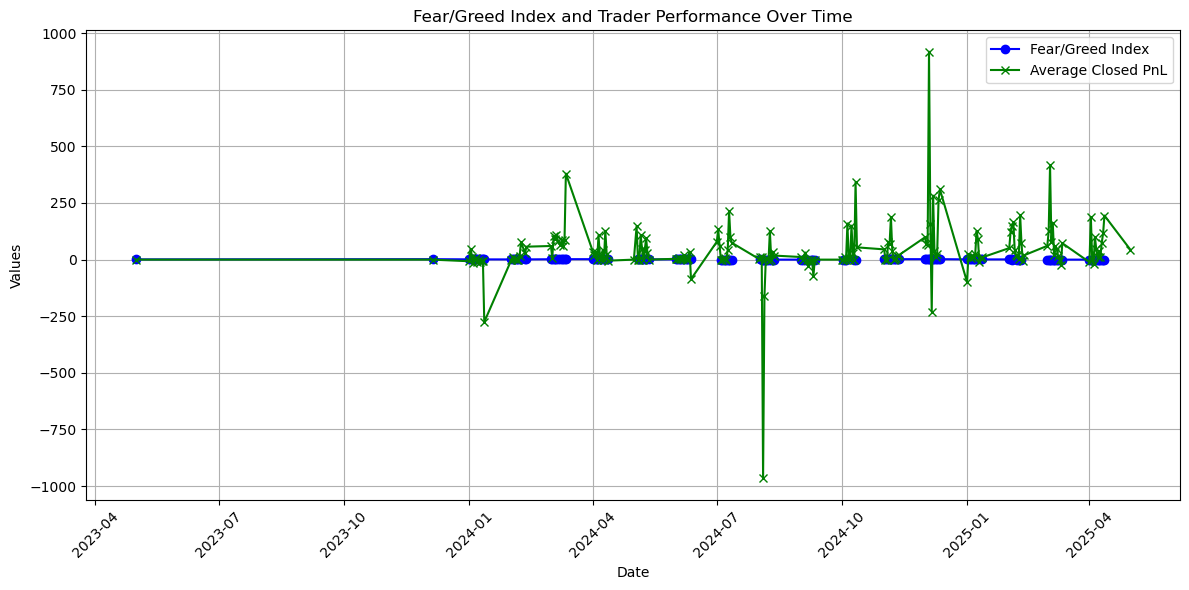

In [19]:
import matplotlib.pyplot as plt

required_columns = ['date', 'classification', 'Closed PnL']
if all(col in data3.columns for col in required_columns):
    sentiment_mapping = {'Fear': 0, 'Greed': 1, 'Extreme Greed': 2, 'Extreme Fear': -1}
    data3['sentiment_numeric'] = data3['classification'].map(sentiment_mapping)

    daily_data = data3.groupby('date').agg({
        'sentiment_numeric': 'mean',
        'Closed PnL': 'mean'
    }).reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(daily_data['date'], daily_data['sentiment_numeric'], label='Fear/Greed Index', color='blue', marker='o')
    
    plt.plot(daily_data['date'], daily_data['Closed PnL'], label='Average Closed PnL', color='green', marker='x')

    plt.title("Fear/Greed Index and Trader Performance Over Time")
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("One or more required columns are missing:", required_columns)

### Risk Analysis

Performance Metrics During Extreme Sentiment Periods:
                Closed PnL                  Size USD                \
                      mean          std         mean           sum   
classification                                                       
Extreme Fear     26.578119   810.927900  5646.396075  1.034137e+08   
Extreme Greed   120.893258  1186.132241  2706.635852  3.036845e+07   

               Execution Price  
                          mean  
classification                  
Extreme Fear       7861.521929  
Extreme Greed      4377.843318  

Performance Metrics During Normal Sentiment Periods:
               Closed PnL                  Size USD                \
                     mean          std         mean           sum   
classification                                                      
Fear            86.681258  1277.470509  7908.681044  2.245354e+08   
Greed           78.677868  1794.090386  4733.657064  6.202511e+07   
Neutral         41.957142   863

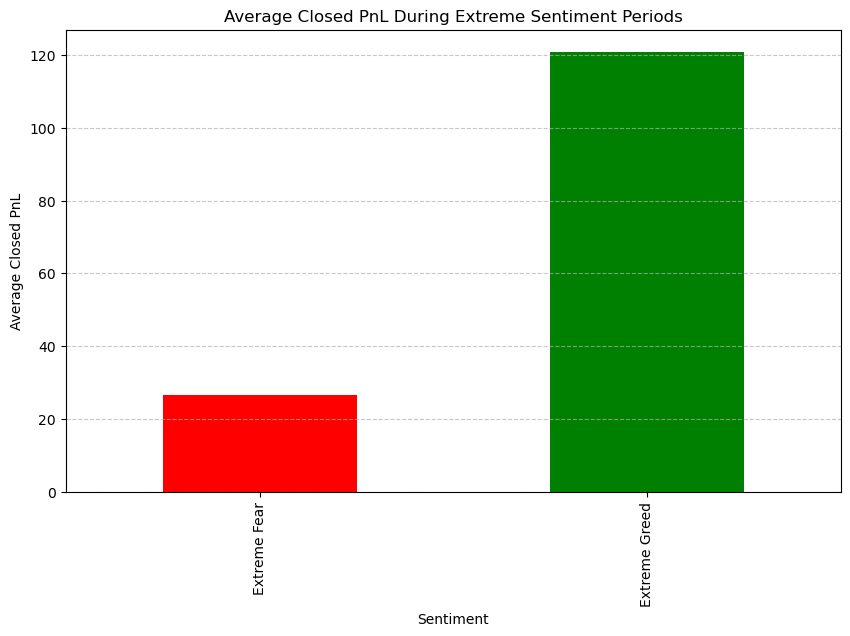


Risk Management Suggestions:
- Reduce position sizes during 'Extreme Greed' to avoid overexposure.
- Tighten stop-loss thresholds during 'Extreme Fear' to limit downside risk.


In [18]:
required_columns = ['classification', 'Closed PnL', 'Size USD', 'Execution Price']
if all(col in data3.columns for col in required_columns):
    extreme_sentiment_data = data3[data3['classification'].isin(['Extreme Greed', 'Extreme Fear'])]

    # Calculate average metrics
    extreme_metrics = extreme_sentiment_data.groupby('classification').agg({
        'Closed PnL': ['mean', 'std'],
        'Size USD': ['mean', 'sum'],
        'Execution Price': 'mean'
    })
    print("Performance Metrics During Extreme Sentiment Periods:")
    print(extreme_metrics)

    # Compare
    normal_sentiment_data = data3[~data3['classification'].isin(['Extreme Greed', 'Extreme Fear'])]
    normal_metrics = normal_sentiment_data.groupby('classification').agg({
        'Closed PnL': ['mean', 'std'],
        'Size USD': ['mean', 'sum'],
        'Execution Price': 'mean'
    })
    print("\nPerformance Metrics During Normal Sentiment Periods:")
    print(normal_metrics)

    plt.figure(figsize=(10, 6))
    extreme_sentiment_data.groupby('classification')['Closed PnL'].mean().plot(kind='bar', color=['red', 'green'])
    plt.title("Average Closed PnL During Extreme Sentiment Periods")
    plt.xlabel("Sentiment")
    plt.ylabel("Average Closed PnL")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    print("\nRisk Management Suggestions:")
    print("- Reduce position sizes during 'Extreme Greed' to avoid overexposure.")
    print("- Tighten stop-loss thresholds during 'Extreme Fear' to limit downside risk.")
else:
    print("One or more required columns are missing:", required_columns)